## Penguin data exploration

<AxesSubplot:>

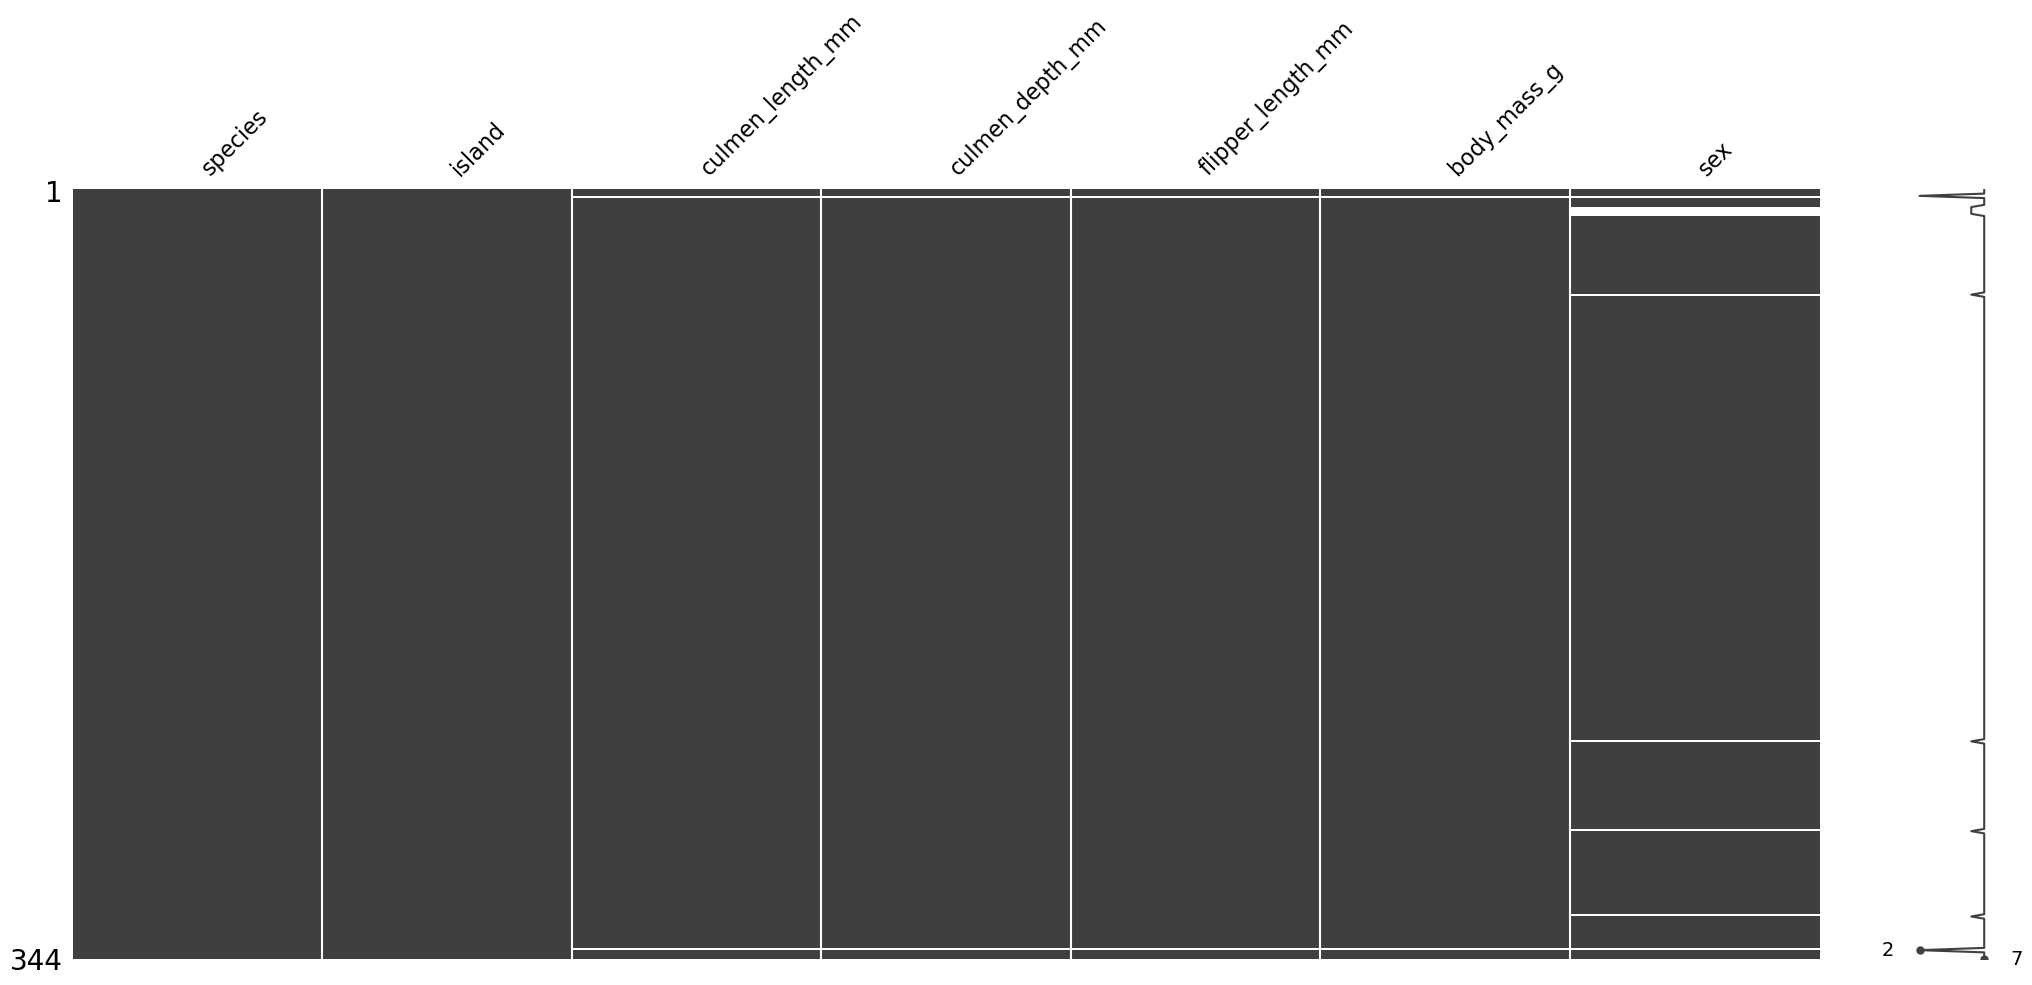

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as mplc
import missingno
from PIL import ImageColor
data = pd.read_csv("penguins_size.csv")

missingno.matrix(data)

**Observations**
- There are few empty cells in the dataset as a whole.
- Most of the empty cells are in the sex column.
- It seems that there are 2 rows that are missing almost all the data except where the penguin was found and what species the penguin was.
- These 2 penguins could be due to a recording error where the scientists were not able to measure the different parts of the penguin before they lost it.
- This could also be true for all the other penguins that do not have a sex value recorded. But that does not explain how all the other attributes were recorded.

**Actions**
- Regression could be used to impute the penguins that are missing the sex attribute. This could be done assuming that male and female penguins in general, have different sized flippers and culmens.
- The penguins that have most of their attributes missing will be removed from the dataset completely since there is only 2 of them.
- Penguins that have no sex value or an invalid sex value will also be removed

Penguin species:  ['Adelie' 'Chinstrap' 'Gentoo']
Islands:  ['Torgersen' 'Biscoe' 'Dream']


Text(0.5, 1.0, 'The number of penguins of each island')

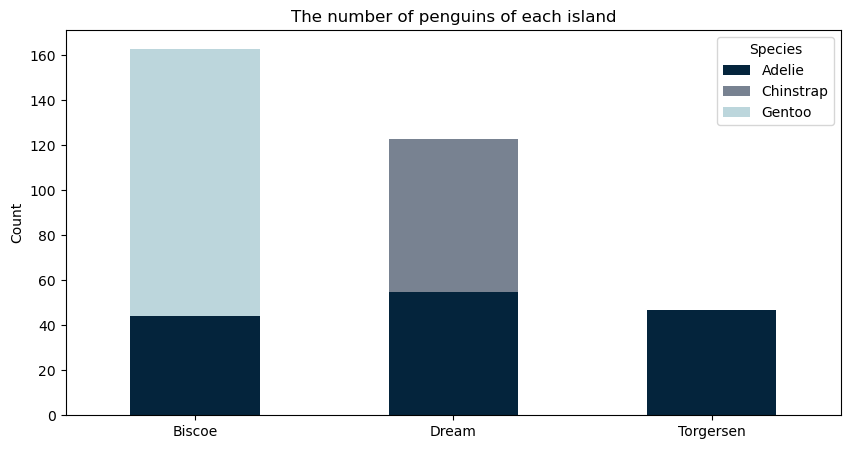

In [155]:

#Removes all rows where the sex column has an empty value
data = data.loc[data.sex.notna()]

#Removes row if the sex column has a . instead of  MALE or FEMALE
data = data.loc[data.sex != "."]

#Dict of colours that will be used
colours = {
    "Adelie"  : "#04243c",
    "Chinstrap"   : "#788291",
    "Gentoo" : "#bcd6dc"
    }

#Gets a list of species
species = data.species.unique()
print("Penguin species: ", species)

#Gets list of islands
islands = data.island.unique()
print("Islands: ", islands)

#Generates subset containing rows of a single species
adelie = data.loc[data.species=="Adelie"]
chin = data.loc[data.species=="Chinstrap"]
gentoo = data.loc[data.species=="Gentoo"]

#Gets counts of species for each island
adelie_count = adelie.island.value_counts()
chin_count = chin.island.value_counts()
gentoo_count = gentoo.island.value_counts()

#Generates dataframe containing all the counts of each species
species_count = pd.DataFrame({"Adelie": adelie_count,"Chinstrap":chin_count,"Gentoo":gentoo_count})

#Generates a list of colours that will be used
species_colours = [colours.get(i) for i in ["Adelie","Chinstrap","Gentoo"]]

#Plots the stacked bar chart
ax = species_count.plot.bar(stacked=True,color=species_colours,figsize=(10,5))
ax.tick_params(axis="x",rotation=0)
ax.set_ylabel("Count")
ax.legend(title="Species")
ax.set_title("The number of penguins of each island")


**Obervations**
- Biscoe contains the most penguins overall
- Torgersen only has Adelie penguins
- Dream contains Adelie and Chinstrap penguins at a similar ratio
- Biscoe contains Adelie and Gentoo. Gentoo at a higher ratio 

Text(0.5, 1.0, 'Ratio of penguin species in the dataset')

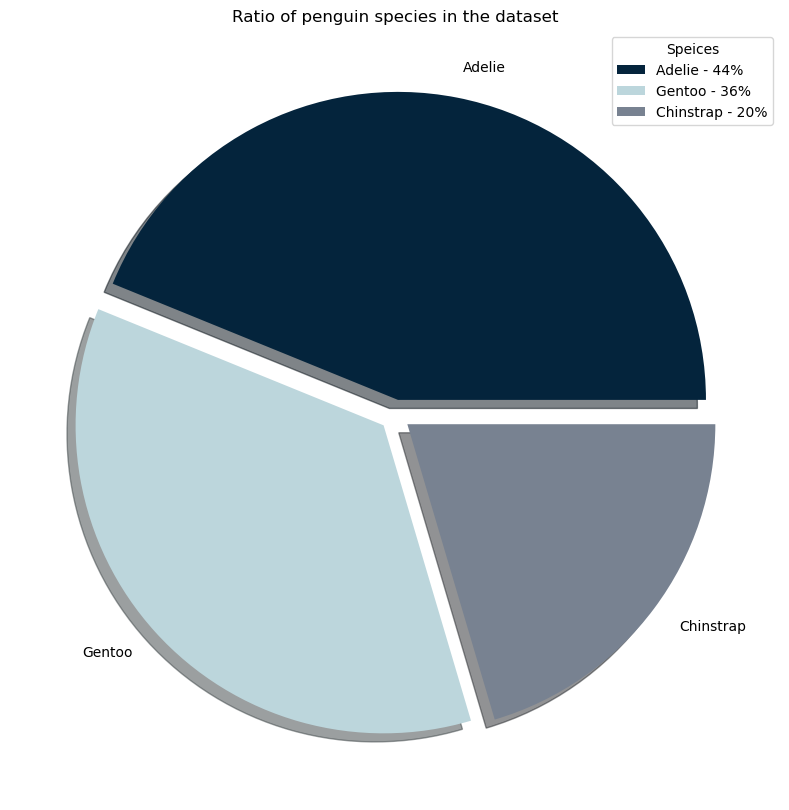

In [156]:
#Generates subset containing the number of entries of each species
total_count = data.species.value_counts()

#Calculates the total number of entries
total = data.species.count()

#Generates a list of strings that will be the legend
#format: "{species} - {ratio in dataset}%"
legend_labels = [f"{i} - {round((x/total)*100)}%" for i,x in zip(total_count.index,total_count)]
#Plots the pie chart in the wanted colours
ax = total_count.plot.pie(colors=[colours["Adelie"],colours["Gentoo"],colours["Chinstrap"]],figsize=(15,10),explode=(0.05,0.05,0.05),shadow=True)
plt.legend(labels=legend_labels, title="Speices")
plt.ylabel("")
plt.title("Ratio of penguin species in the dataset")


**Obervations**
- Adelie make up most of the dataset
- Chinstraps make up the least of the dataset

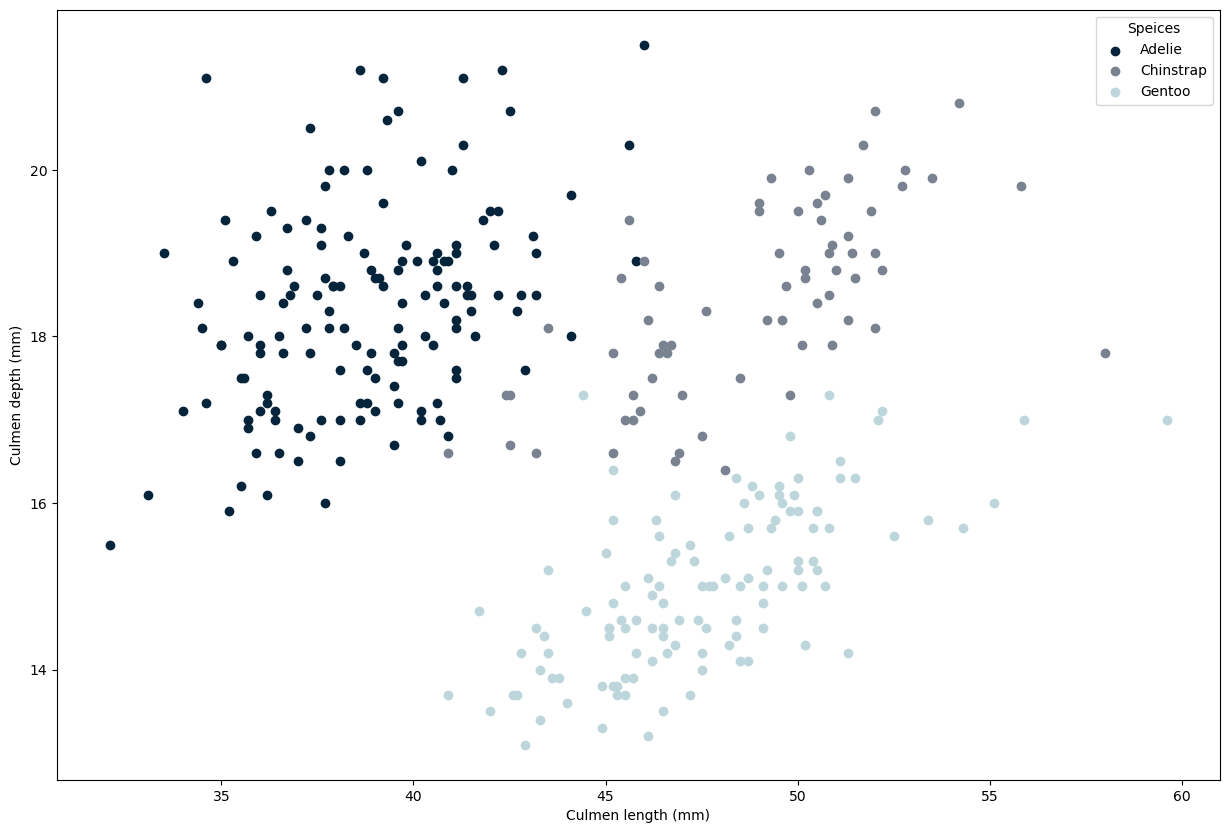

In [157]:
#Column titles
variables = ["culmen_length_mm","culmen_depth_mm"]

#Generates the figure and sets a fig size
plt.figure(figsize=(15,10))

#Plots 3 scatter plots onto the same figure according to species
plt.scatter(adelie[variables[0]],adelie[variables[1]],label="Adelie",c=colours["Adelie"])
plt.scatter(chin[variables[0]],chin[variables[1]],label="Chinstrap",c=colours["Chinstrap"])
plt.scatter(gentoo[variables[0]],gentoo[variables[1]],label="Gentoo",c=colours["Gentoo"])

#Figure options
plt.xlabel("Culmen length (mm)")
plt.ylabel("Culmen depth (mm)")
plt.legend(title="Speices")

**Observations**
- Gentoo have similar length to Chinstrap
- Gentoo have shallowest depth
- Adelie have deepest and shortest

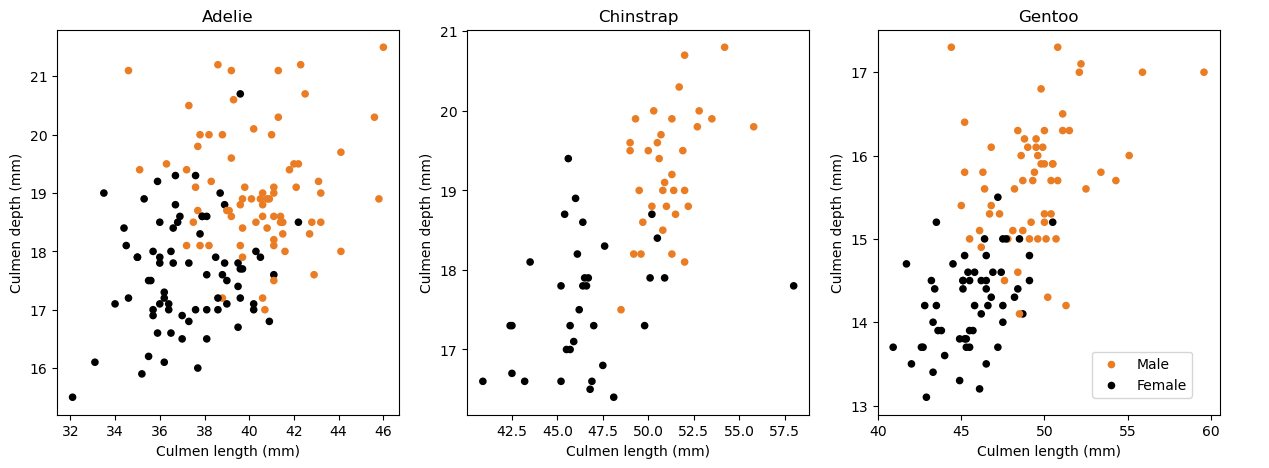

In [158]:

#Colour mapping for different sex
sex_colours = {"MALE" : "#EA7D23", "FEMALE" : "#000000"}

#X axis label
x_tag = "Culmen length (mm)"

#Y axis label
y_tag = "Culmen depth (mm)"


fig, axs = plt.subplots(1,3,figsize=(15,5))

#Plots the Adelie dataset and colours according to sex
adelie.plot.scatter(x=variables[0],y=variables[1],ax=axs[0],c=adelie.sex.map(sex_colours))
axs[0].set_xlabel(x_tag)
axs[0].set_ylabel(y_tag)
axs[0].set_title("Adelie")

#Plots the Chinstrap dataset and colours according to sex
chin.plot.scatter(x=variables[0],y=variables[1],ax=axs[1],c=chin.sex.map(sex_colours))
axs[1].set_xlabel(x_tag)
axs[1].set_ylabel(y_tag)
axs[1].set_title("Chinstrap")

#Plots the Gentoo dataset and colours according to sex
gentoo.plot.scatter(x=variables[0],y=variables[1],ax=axs[2],c=gentoo.sex.map(sex_colours))
axs[2].set_xlabel(x_tag)
axs[2].set_ylabel(y_tag)
axs[2].set_title("Gentoo")

#Places a common legend for all plots
fig.legend(labels=["Male","Female"],loc=(0.86,0.15))


**Obervations**
- Clear separation between male and female in all populations
- Females have shorter, shallower culmens
- Separation most noticable in the Chinstraps but this may be due to lack of datapoints

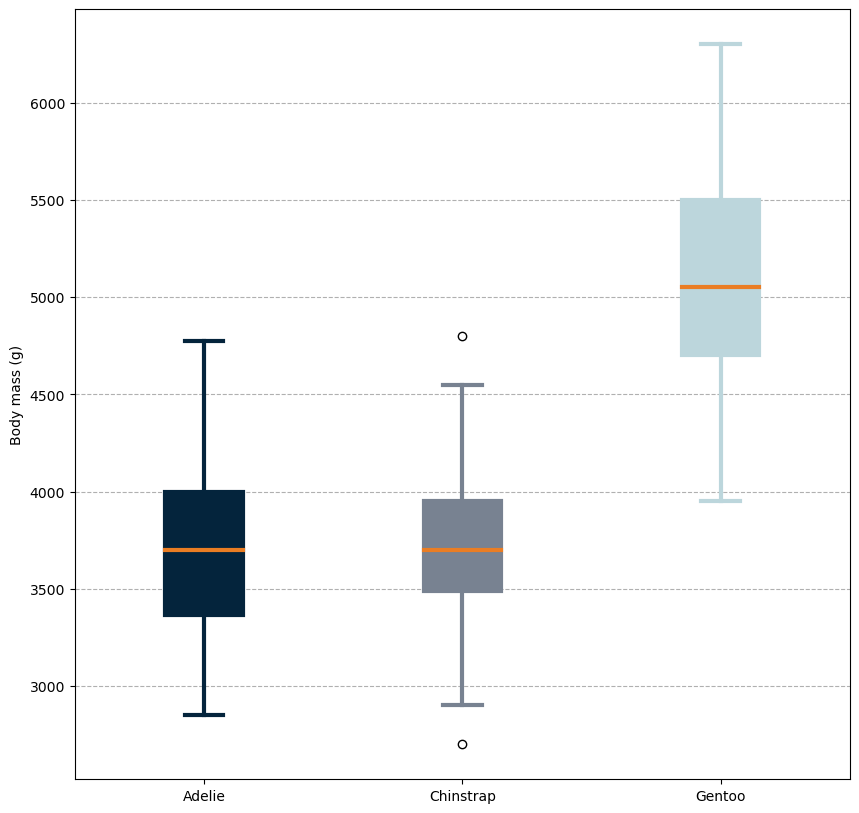

In [159]:

#Dataframe combining the mass data for each type of penguin
mass_df = pd.DataFrame({
    "Adelie" : adelie.body_mass_g,
    "Chinstrap" : chin.body_mass_g,
    "Gentoo" : gentoo.body_mass_g
})

#Generates plot and returns the patches to be edited
ax,patches = mass_df.plot.box(figsize=(10,10),widths=0.3,patch_artist=True,return_type="both")
ax.set_ylabel("Body mass (g)")
ax.grid(linestyle="--",axis="y")

#Loops through the box and median line patches along with the colours
for box,med,colour in zip(patches["boxes"],patches["medians"],colours.values()):
    
    #Box settings
    box.set_color(colour)
    box.set_linewidth(3)

    #Median line settings
    med.set_color(sex_colours["MALE"])
    med.set_linewidth(3)

#Loops in order to change the colour of the 2 whisker and cap patches each plot has
for i,colour in zip(range(0,6,2),colours.values()):
    #Loops through each plots patches
    for j in range(2):

        whisk = patches["whiskers"][i+j]
        cap = patches["caps"][i+j]
        
        #Whisker settings
        whisk.set_color(colour)
        whisk.set_linewidth(3)

        #Cap settings
        cap.set_color(colour)
        cap.set_linewidth(3)

**Obervations**
- Gentoo are the heaviest penguins
- Adelie and Chinstraps have similar average masses
- Adelie masses are more variable then the chinstraps
- Chinstrap has some outliers that the other penguins do not have

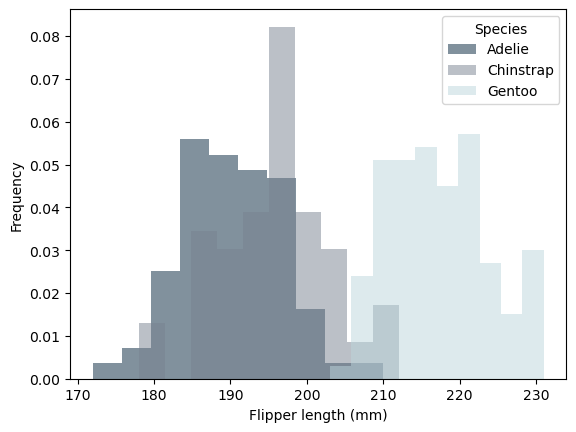

In [160]:
#Plots 3 seperate histograms and noramlises them
adelie.flipper_length_mm.plot.hist(color=colours["Adelie"],density=True,alpha=0.5,label="Adelie")
chin.flipper_length_mm.plot.hist(color=colours["Chinstrap"],density=True,alpha=0.5,label="Chinstrap")
gentoo.flipper_length_mm.plot.hist(color=colours["Gentoo"],density=True,alpha=0.5,label="Gentoo")
plt.xlabel("Flipper length (mm)")
plt.legend(title="Species")

**Observations**
- Gentoo have the longest flipper length
- Adelie have the smallest flippers in general
- Chinstraps generally have similar flipper sizes to eachother 

Text(0.5, 0, 'Body mass (g)')

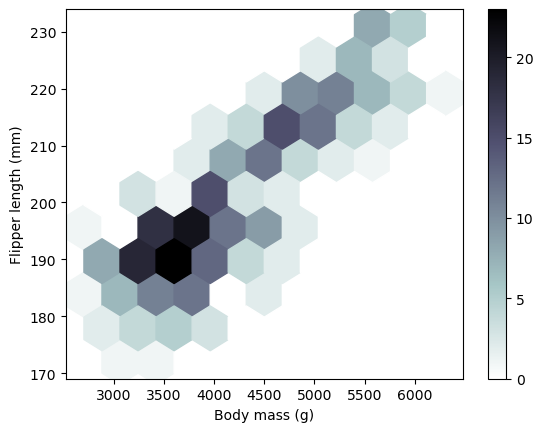

In [191]:
#Gets the colourmap
colour_map = mpl.colormaps["bone"]

#Reverses the colourmap
colour_map = colour_map(np.linspace(0,1,256))[::-1]

#Converts the reversed colourmap into a colourmap that can be used
new_map = mplc.ListedColormap(colour_map,name="new_map")

#Plots a hex 2d histogram using the new colourmap
data.plot.hexbin(y="flipper_length_mm",x="body_mass_g",gridsize=10,cmap=new_map)
plt.ylabel("Flipper length (mm)")
plt.xlabel("Body mass (g)")

**Obervations**
- In general, flipper length and body mass have a positive correlation for all spieces
- Though you can see a seperation between penguins at (3500,190) and (4750,215). These are probably the Gentoo and the other 2 penguins
